In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Data Summary

Id: Unique for each Propety Listing.

name: Name of the each Propety Listing.

host_id: Unique ID for host who have listed the property on Airbnb.

host_name: Name of host

neighbourhood_group: Name of Each boroughs of NYC, Manhattan, Brooklyn,Queens,Bronx, State Island.

neighbourhood: Area in each borough of NYC

latitude, longitude: Co-ordinates of each listed property

room_type: Differnt types of room available for listing , Private room,Entire home/apt,Shared room.

price: Price of listing.

minimum_nigths: Mandatory number of nights to be booked for available for each type of property.

number_of_review: Number of reviews for each Listed property

last_review: Date on whcih last time the listing was reviewed

review_per_month: Number of reviews per month

calculated_host_listings_count: Number of listing each host owns

availablity_365: Number of days the given listing is available for booking

## Import all the necessary libraries
The initial step involves importing essential Python libraries, such as Pandas for dataframe operations, along with data visualization libraries like Matplotlib, and Seaborn.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing and Reading the dataset
During this step, we'll load the dataset and examine its attributes. Since our dataset is in CSV format, we'll utilize the .read_csv() function to load it.

In [3]:
# Importing the dataset
df = pd.read_csv(r"C:\Users\Gourav vijay Gaikwad\Downloads\Oasis Datasets/AB_NYC_2019.csv")

In [4]:
# Reading the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Shape of the dataset

In [5]:
df.shape

(48895, 16)

## Unique columns in the dataset

In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Data types of attributes in the dataset

In [7]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Information of the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Statistical Description of the dataset

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Observation
Prices of the bookings vary from 0 to $10,000

## Checking for Duplicated records in the dataset
In this step, I will check for any duplicate records within the dataset. If duplicates are identified, I will proceed to remove them.

In [10]:
df.duplicated().sum()

0

#### Observation
Dataset do not contain duplicated records

## Checking for Null/Empty Values in the dataset
In this step, our initial task is to ascertain if the dataset contains any null values. If null values are detected, our course of action will be to eliminate them.

In [11]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Observation
* As we can see, dataset do contain null/empty values
* "name" feature contains 16 null values
* "host_name" contains 21 null values
* "last_review" contains 10052 null values
* "reviews_per_month" also contains 10052 null values

## Replacing the null values with appropriate values

In [12]:
df['name'].replace(np.nan, 'Other Hotel', inplace =True)
df['host_name'].replace(np.nan, 'other', inplace = True)
df['last_review'].replace(np.nan, 'Not Reviewed', inplace = True)
df['reviews_per_month'].replace(np.nan, '0', inplace = True)

In [13]:
# Checking if all null values removed or not
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### Observation
All the null/empty values are being replaced by appropriate values

## Removing unnecessary attributes
With our goal in mind, I aim to eliminate any unnecessary columns from the dataset in this step, as they serve no purpose.

In [14]:
df.drop(['id', 'name', 'last_review'], axis = 1, inplace = True)

In [15]:
df.columns

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

#### Observation
We can see, our dataset is now free from the unnecessary columns

In [16]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [17]:
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [18]:
len(df['neighbourhood'].unique())

221

#### Observation
There are 221 unique neighbourhoods in neighbourhood groups

In [19]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Selected the price column for detecting and removing outliers

I am using the quantile method for detecting outliers.

In [20]:
min_maxes = ([0.1,0.9],[0.5,0.95],[0.05,0.95],[0.01,0.99])
for min_max in min_maxes:
    print("Percentile :",min_max[0],"Minimum threshold :",df['price'].quantile(min_max[0]))
    print("Percentile :",min_max[1],"Maximum threshold :",df['price'].quantile(min_max[1]))

Percentile : 0.1 Minimum threshold : 49.0
Percentile : 0.9 Maximum threshold : 269.0
Percentile : 0.5 Minimum threshold : 106.0
Percentile : 0.95 Maximum threshold : 355.0
Percentile : 0.05 Minimum threshold : 40.0
Percentile : 0.95 Maximum threshold : 355.0
Percentile : 0.01 Minimum threshold : 30.0
Percentile : 0.99 Maximum threshold : 799.0


I chose the third list of quantiles

In [21]:
min_thresh,max_thresh = df['price'].quantile([0.05,0.955])

Removing outliers

In [22]:
required_df = df.query("price < @max_thresh and price > @min_thresh")

Checking original stats and our generated data stats

In [23]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [24]:
required_df['price'].describe()

count    43846.000000
mean       129.383775
std         72.333948
min         41.000000
25%         73.000000
50%        110.000000
75%        170.000000
max        379.000000
Name: price, dtype: float64

# Addressing Some Analytical Questions

In [25]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0


## Question 1: What are the top 10 host IDs with the highest number of bookings?

In [26]:
# getting value counts
df['host_id'].value_counts().iloc[:10]

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

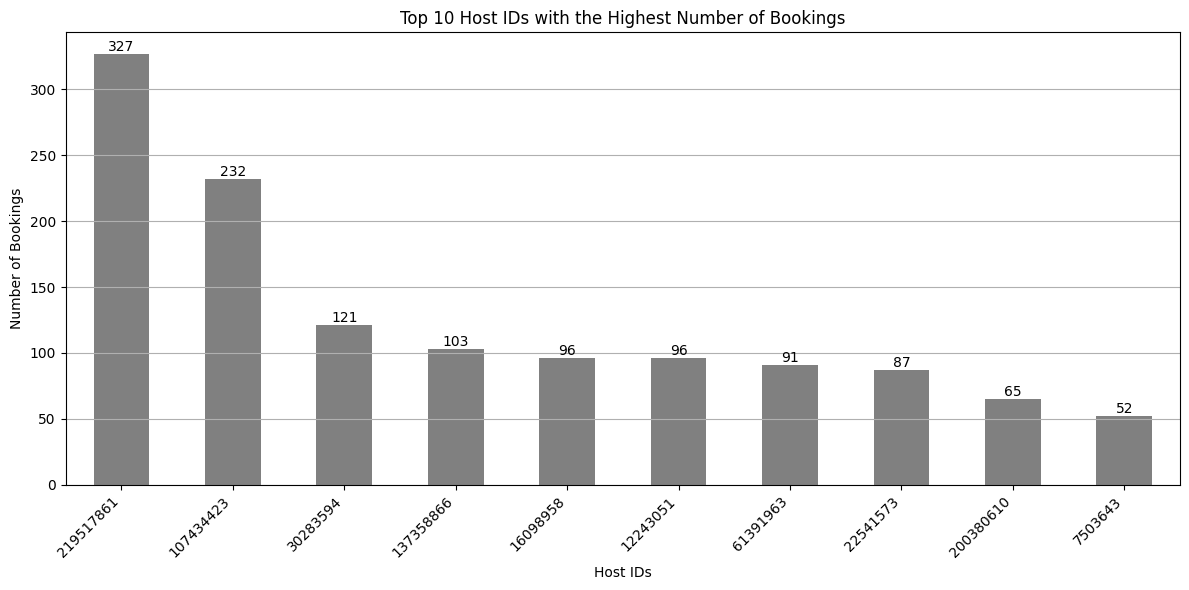

In [27]:
# Visualizing top 10 host IDs with the highest number of bookings
top_10_host_IDs = df['host_id'].value_counts().iloc[:10]
# Plotting
plt.figure(figsize=(12, 6)) 
ax = top_10_host_IDs .plot(kind='bar', color='grey')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 Host IDs with the Highest Number of Bookings')
plt.xlabel('Host IDs')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y')  
plt.tight_layout()
plt.show()

In [28]:
# Percentage of bookings for Top 10 Host ID's 
hostidPer = (df['host_id'].value_counts().iloc[:10].sort_values(ascending=False)/len(df))*100
hostidPer

host_id
219517861    0.668780
107434423    0.474486
30283594     0.247469
137358866    0.210655
16098958     0.196339
12243051     0.196339
61391963     0.186113
22541573     0.177932
200380610    0.132938
7503643      0.106350
Name: count, dtype: float64

#### Observation
The first Host ID from the top 10 host id's has 327 bookings constitutes to 66.8% of Total bookings
The 10th Host ID from the top 10 host id's has only 52 bookings

## Question 2: What are the top 10 host Names with the highest number of bookings?

In [29]:
# Getting value counts 
df['host_name'].value_counts().iloc[:10]

host_name
Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: count, dtype: int64

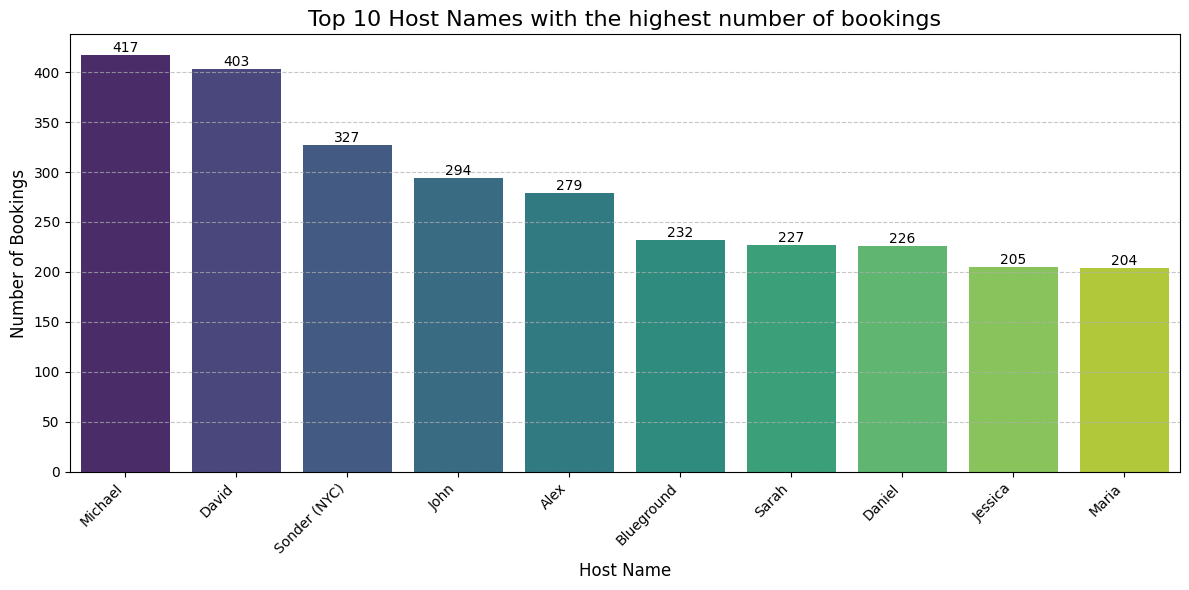

In [30]:
# Visualizing the Top 10 Host Names with the highest number of bookings
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=df['host_name'].value_counts().iloc[:10].keys(), y=df['host_name'].value_counts().iloc[:10], palette="viridis") 
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Top 10 Host Names with the highest number of bookings", fontsize=16)
plt.xlabel("Host Name", fontsize=12)
plt.ylabel("Number of Bookings", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

In [31]:
# Percentage of bookings for Top 10 Host Names
hostnamePer = (df['host_name'].value_counts().iloc[:10].sort_values(ascending=False)/len(df))*100
hostnamePer

host_name
Michael         0.852848
David           0.824215
Sonder (NYC)    0.668780
John            0.601288
Alex            0.570610
Blueground      0.474486
Sarah           0.464260
Daniel          0.462215
Jessica         0.419266
Maria           0.417221
Name: count, dtype: float64

#### Observation
* The host named Michael has 417 bookings attributed to him, accounting for 85% of the total bookings.
* The person with the Name David stands at the second position with the total bookings of 403.

In [32]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0


## Question 3: What types of rooms does the host with the highest number of bookings offer, and what is the price range for these rooms?

In [33]:
# Rooms that Michael offers
df.loc[df['host_name']=="Michael"]['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [34]:
# Total bookings
df.loc[df['host_name']=="Michael"]['room_type'].count()

417

In [35]:
# Count of bookings for each room type
df.loc[df['host_name']=="Michael"]['room_type'].value_counts()

room_type
Entire home/apt    251
Private room       152
Shared room         14
Name: count, dtype: int64

In [36]:
# Price Description
df.loc[df['host_name']=="Michael"]['price'].describe()

count     417.000000
mean      160.419664
std       151.987059
min        25.000000
25%        75.000000
50%       120.000000
75%       198.000000
max      1700.000000
Name: price, dtype: float64

#### Observation
Michael, the host with the highest number of bookings, offers all room types, including Private rooms, Entire home/apts, and Shared rooms. Specifically, he has 251 Entire home/apts, 152 private rooms, and 14 Shared rooms. The price range for these accommodations is between 25 and 1700 (dollars)

## Question 4: What types of rooms does the host with the second highest number of bookings offer, and what is the price range for these rooms?

In [37]:
# Rooms that David offers
df.loc[df['host_name']=="David"]['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [38]:
# Total Bookings
df.loc[df['host_name']=="David"]['room_type'].count()

403

In [39]:
# Count of bookings for each room type
df.loc[df['host_name']=="David"]['room_type'].value_counts()

room_type
Entire home/apt    214
Private room       184
Shared room          5
Name: count, dtype: int64

In [40]:
# Price Description
df.loc[df['host_name']=="David"]['price'].describe()

count     403.000000
mean      163.384615
std       169.275522
min        25.000000
25%        75.000000
50%       119.000000
75%       199.000000
max      2000.000000
Name: price, dtype: float64

#### Observation
David, the host with the second-highest number of bookings, provides all types of rooms, including Private rooms, Entire home/apts, and Shared rooms. Specifically, he offers 214 Entire home/apts, 184 private rooms, and 5 Shared rooms. The price range for these accommodations falls between 25 and 
2000.

In [41]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0


## Question 5: Which Neighbourhood group has the highest number of bookings?

In [42]:
# Getting value counts
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

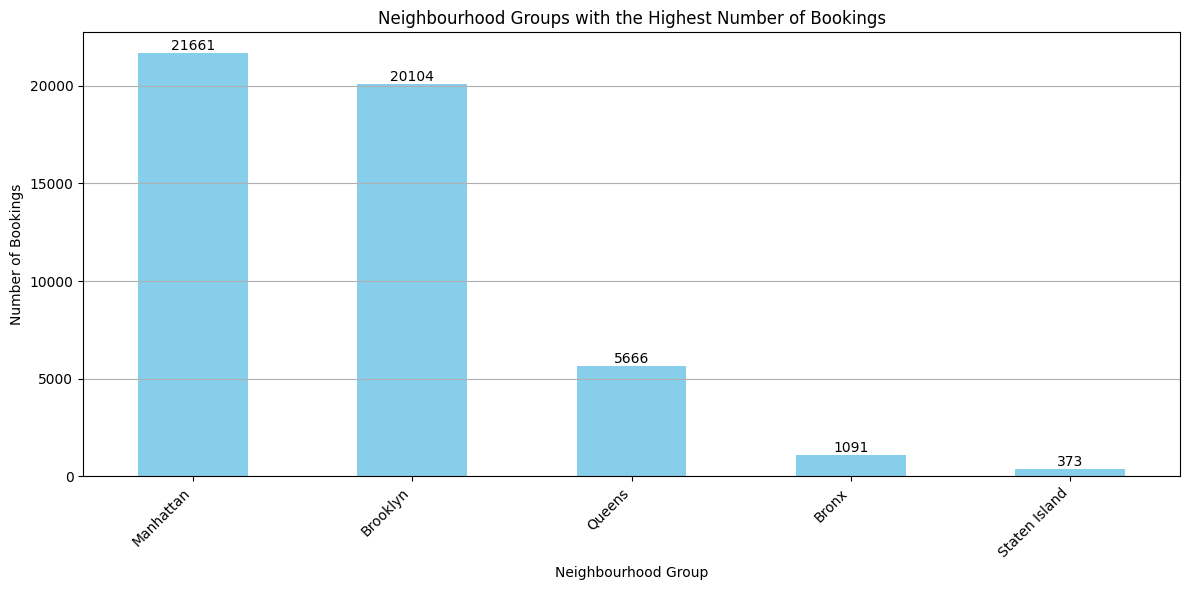

In [43]:
# Visualizing neighbourhood groups with the highest number of bookings
neightop = df['neighbourhood_group'].value_counts()
# Plotting
plt.figure(figsize=(12, 6)) 
ax = neightop.plot(kind='bar', color='skyblue')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Neighbourhood Groups with the Highest Number of Bookings')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y')  
plt.tight_layout()
plt.show()


In [44]:
# Percentage of bookings for Neighbourhood groups
neighbourhood_grpPer = (df['neighbourhood_group'].value_counts().sort_values(ascending=False)/len(df))*100
neighbourhood_grpPer

neighbourhood_group
Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: count, dtype: float64

Text(0.5, 1.0, 'Neighbourhood Group')

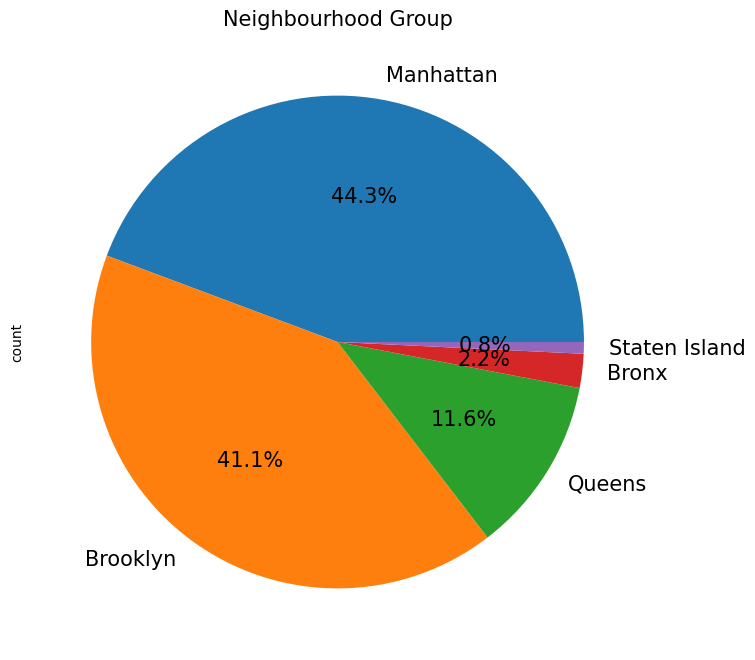

In [45]:
# Visualizing using pie chart
df['neighbourhood_group'].value_counts().plot(kind = 'pie', figsize = (8,8), fontsize = 15, autopct = '%1.1f%%')
plt.title("Neighbourhood Group", fontsize = 15)

#### Observation
* An observation reveals that among all the neighborhood groups, the Manhattan group has the highest number of bookings, totaling 21,661, which constitutes 44.3% of all bookings across all groups.

* Brooklyn ranks as the second-highest neighborhood group with a total of 20,104 bookings, covering 41% of all bookings.

* Staten Island is the neighbourhood group with the least number of bookings which constitutes only 0.76% of all the bookings

## Question 6: Which Neighbourhood Group has the maximum price range for rooms?

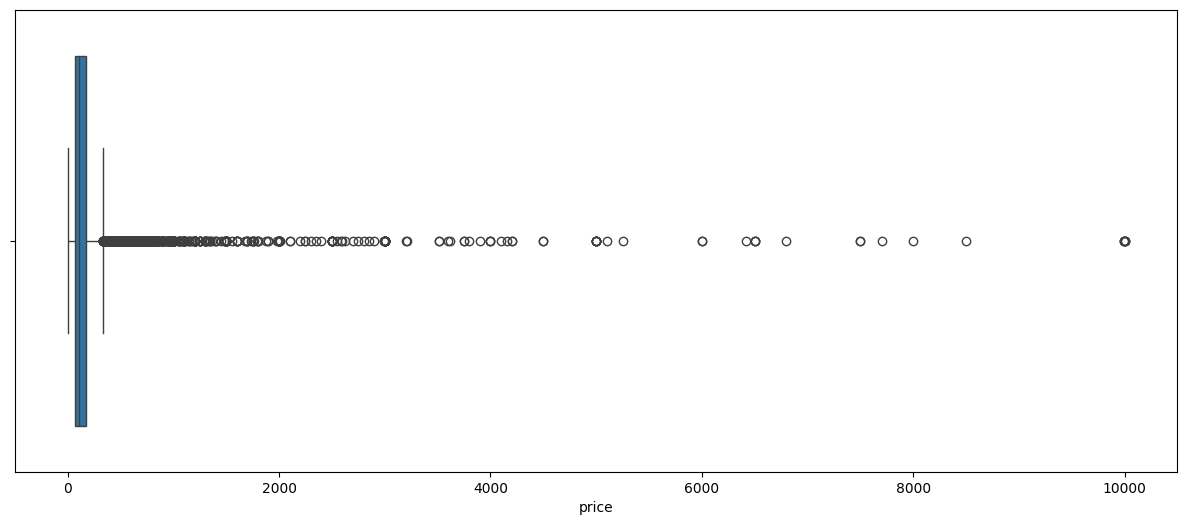

In [46]:
plt.figure(figsize = (15,6))
sns.boxplot(x = df['price'])
plt.show()

In [47]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

## Probability Density Fuction

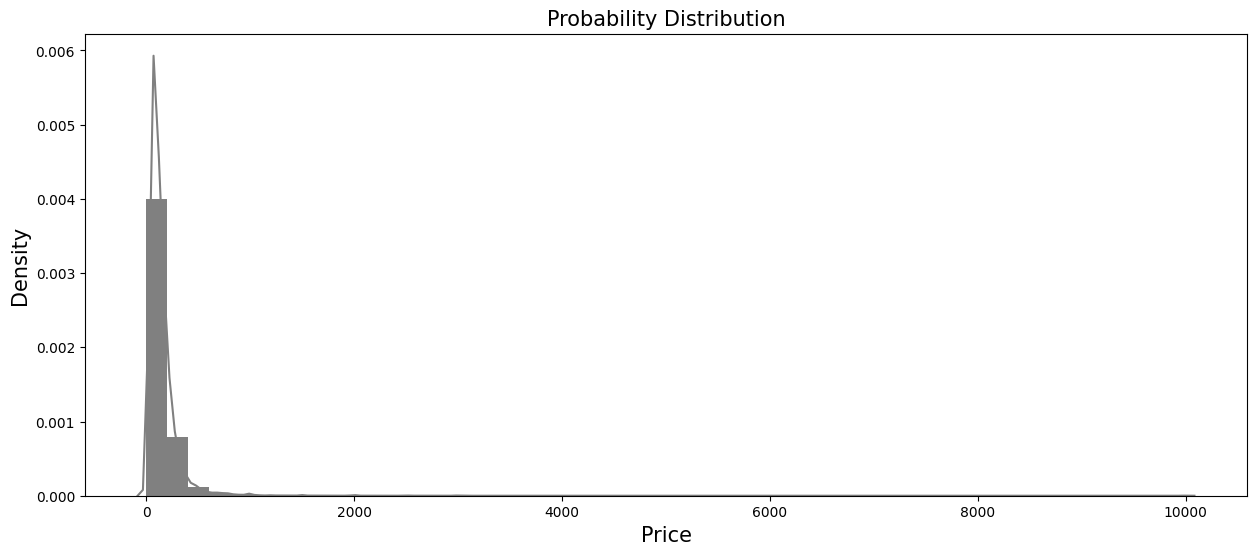

In [48]:
plt.figure(figsize = (15,6))
sns.distplot(df['price'], color = 'grey', hist_kws={"linewidth": 15,'alpha':1})
plt.title("Probability Distribution", fontsize = 15)
plt.xlabel('Price', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.show()

## Interquartile Range

In [49]:
Q1 = np.percentile(df['price'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(df['price'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

print('The IQR is',IQR)
print('The Minimum value is', (Q3 - (1.5* (IQR))))
print('The maximum value is', (Q3 + (1.5* (IQR))))

The IQR is 106.0
The Minimum value is 16.0
The maximum value is 334.0


#### Observation
As we can see that 99% of the data lies within 334 dollar with mean being 153 and median 106.

In [50]:
df_new = df[df['price'] < 334 ]
df_new.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0


In [51]:
df.groupby(['neighbourhood_group'])['price'].describe().T.reset_index()

neighbourhood_group,index,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,count,1091.000000,20104.000000,21661.000000,5666.000000,373.000000
1,mean,87.496792,124.383207,196.875814,99.517649,114.812332
2,std,106.709349,186.873538,291.383183,167.102155,277.620403
3,min,0.000000,0.000000,0.000000,10.000000,13.000000
4,25%,45.000000,60.000000,95.000000,50.000000,50.000000
5,50%,65.000000,90.000000,150.000000,75.000000,75.000000
6,75%,99.000000,150.000000,220.000000,110.000000,110.000000
7,max,2500.000000,10000.000000,10000.000000,10000.000000,5000.000000


#### Observation
* The price range for Bronx Neighbourhood group is in the range 0 and 2500
* The price range for Brooklyn Neighbourhood group is in the range 0 and 10000
* The price range for Manhattan Neighbourhood group is in the range 0 and 10000
* The price range for Queens Neighbourhood group is in the range 10 and 10000
* The price range for Staten Island Neighbourhood group is in the range 13 and 5000

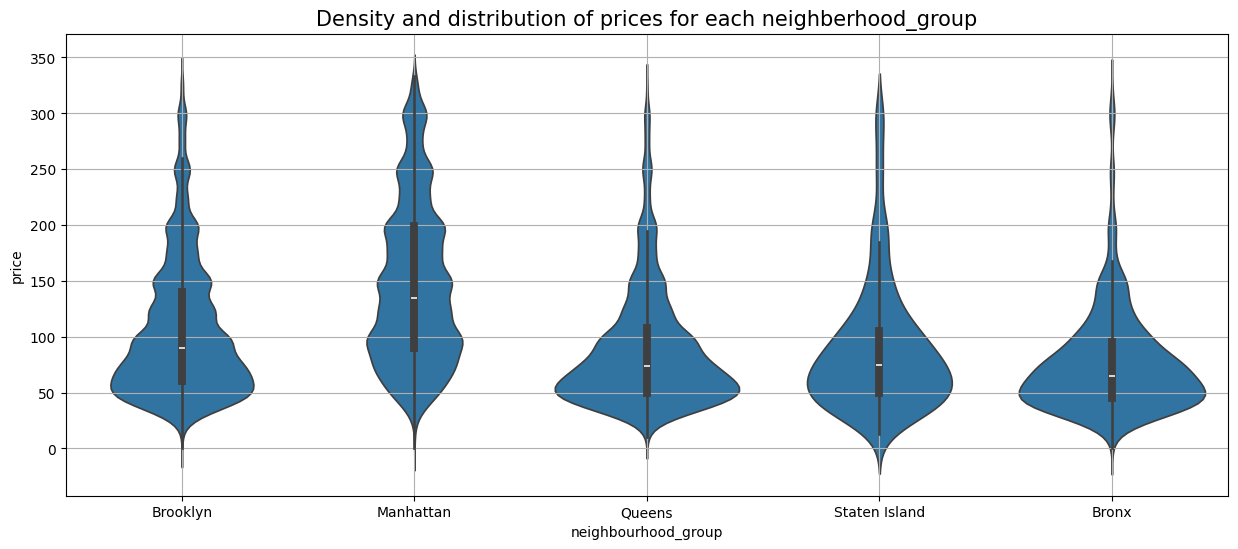

In [52]:
plt.figure(figsize = (15,6))
sns.violinplot(data = df_new, x = df_new['neighbourhood_group'], y = df_new['price'])
plt.title('Density and distribution of prices for each neighberhood_group', fontsize = 15)
plt.grid()

Text(0.5, 1.0, 'Bronx')

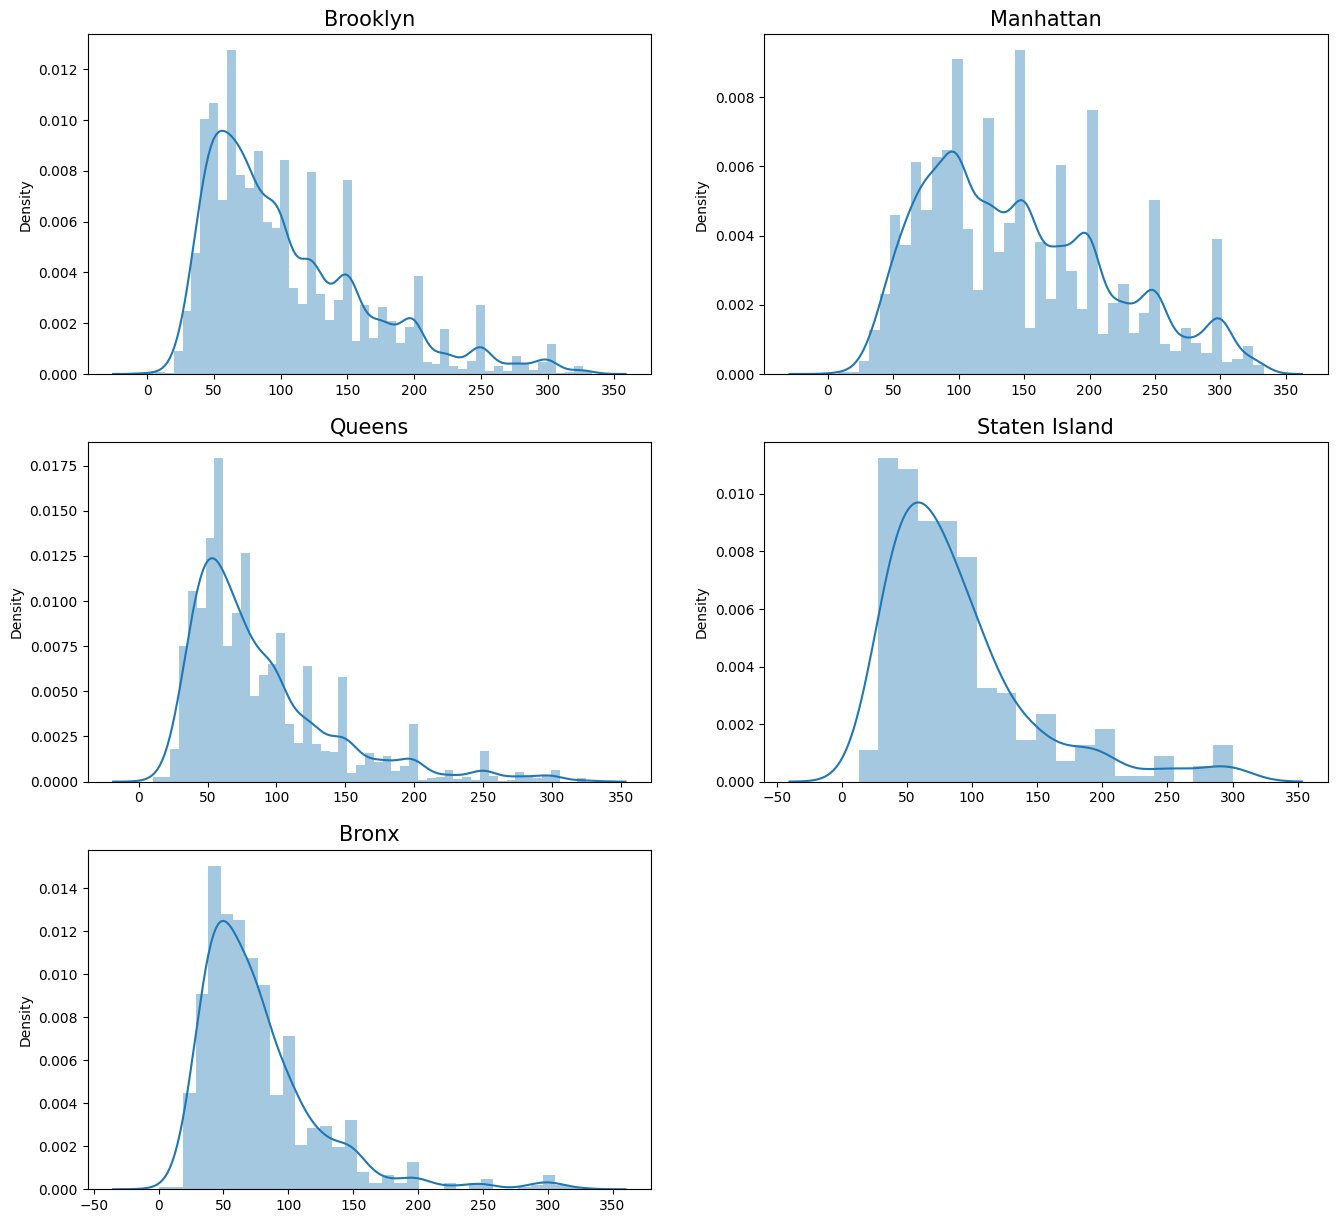

In [53]:
plt.figure(figsize = (16,15))

plt.subplot(3,2,1)
n1 = df_new[df_new['neighbourhood_group'] == 'Brooklyn']
sns.distplot(x = n1['price'])
plt.title("Brooklyn", fontsize = 15)

plt.subplot(3,2,2)
n2 = df_new[df_new['neighbourhood_group'] == 'Manhattan']
sns.distplot(x = n2['price'])
plt.title("Manhattan", fontsize = 15)

plt.subplot(3,2,3)
n3 = df_new[df_new['neighbourhood_group'] == 'Queens']
sns.distplot(x = n3['price'])
plt.title("Queens", fontsize = 15)

plt.subplot(3,2,4)
n4 = df_new[df_new['neighbourhood_group'] == 'Staten Island']
sns.distplot(x = n4['price'])
plt.title("Staten Island", fontsize = 15)

plt.subplot(3,2,5)
n5 = df_new[df_new['neighbourhood_group'] == 'Bronx']
sns.distplot(x = n5['price'])
plt.title("Bronx", fontsize = 15)

#### Observation
* we can observe that Manhattan has the highest range of prices for the listings with 150 price as median observation, followed by Brooklyn with 90 per night.

* Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all.

## Question 7: What are the Top 10 Neighbourhoods having highest number of bookings?

In [54]:
df['neighbourhood'].value_counts().iloc[:10]

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64

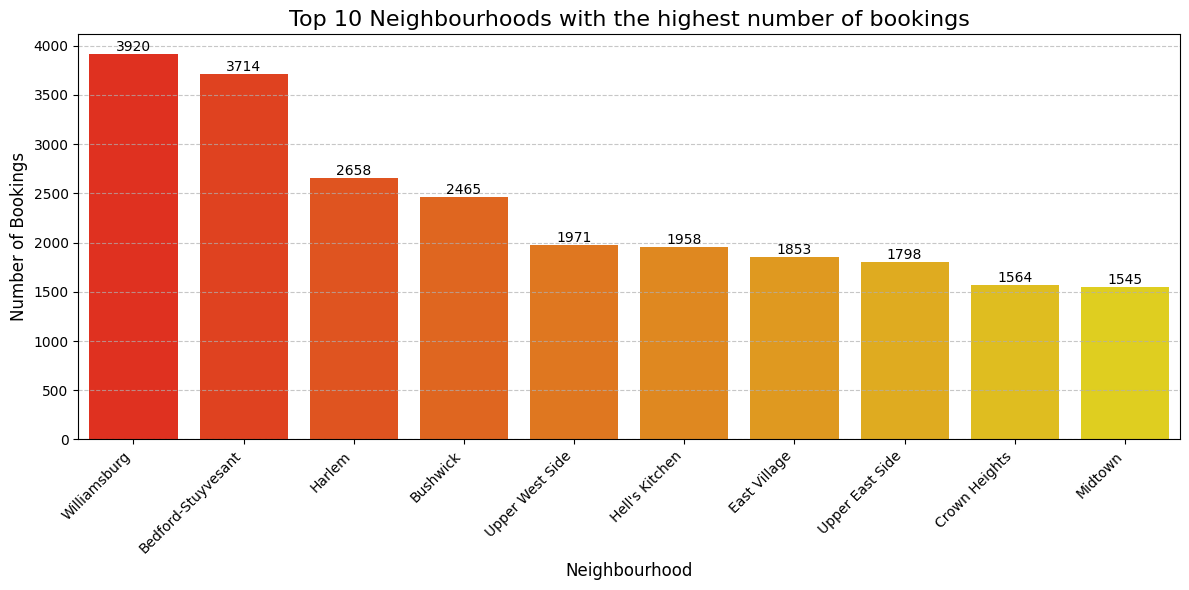

In [55]:
# Visualizing the Top 10 Neighbourhoods with the highest number of bookings
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=df['neighbourhood'].value_counts().iloc[:10].keys(), y=df['neighbourhood'].value_counts().iloc[:10], palette="autumn") 
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Top 10 Neighbourhoods with the highest number of bookings", fontsize=16)
plt.xlabel("Neighbourhood", fontsize=12)
plt.ylabel("Number of Bookings", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

In [56]:
# Percentage of bookings for Top 10 Neighbourhoods
NeighbourhoodsPer = (df['neighbourhood'].value_counts().iloc[:10].sort_values(ascending=False)/len(df))*1000
NeighbourhoodsPer 

neighbourhood
Williamsburg          80.171797
Bedford-Stuyvesant    75.958687
Harlem                54.361387
Bushwick              50.414153
Upper West Side       40.310870
Hell's Kitchen        40.044994
East Village          37.897536
Upper East Side       36.772676
Crown Heights         31.986911
Midtown               31.598323
Name: count, dtype: float64

#### Observation
* The Williamsburg neighborhood has the highest number of bookings, totaling 3,920, which constitutes 80% of all bookings.
* The Bedford-Stuyvesant constitutes 75% of bookings with the total bookings of 3714

## Question 8: Which room type has highest number of bookings?

In [57]:
# Getting the value counts
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

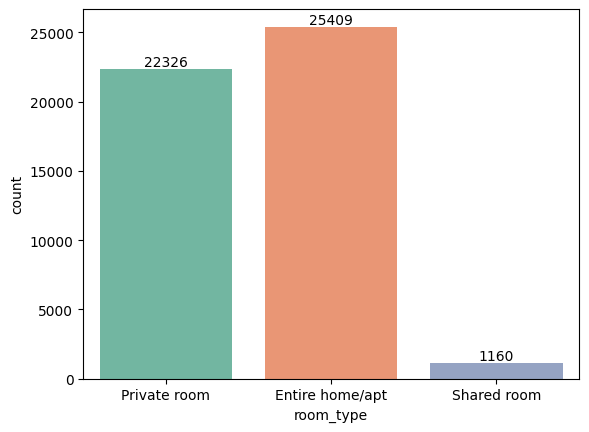

In [58]:
# Visualizing using Count Plot
ax = sns.countplot(x = 'room_type',data = df, palette="Set2")

for bars in ax.containers:
    ax.bar_label(bars)

In [59]:
# Percentage of bookings individual room type
room_typeBookings = (df['room_type'].value_counts().sort_values(ascending=False)/len(df))*100
room_typeBookings

room_type
Entire home/apt    51.966459
Private room       45.661111
Shared room         2.372431
Name: count, dtype: float64

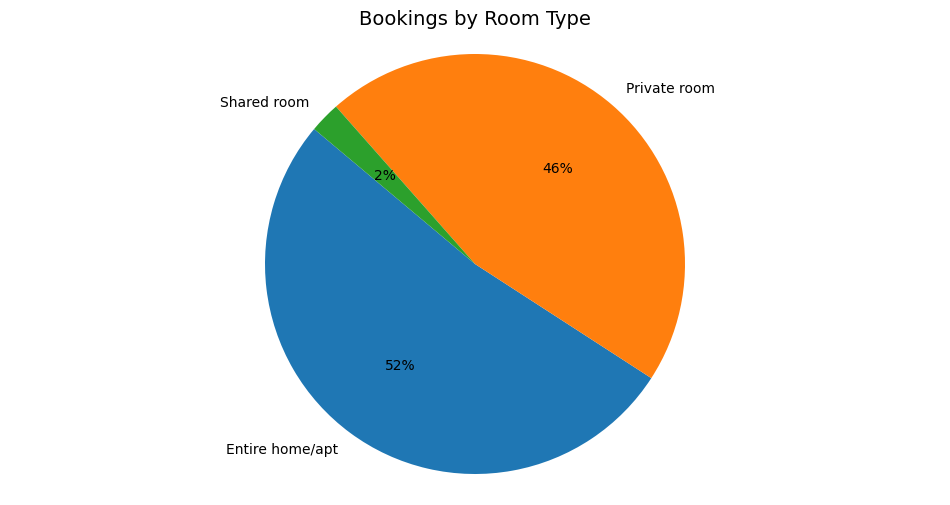

In [60]:
plt.figure(figsize=(12, 6))
plt.pie(room_typeBookings, labels=room_typeBookings.index, autopct='%.0f%%', startangle=140)
plt.title("Bookings by Room Type", fontsize=14)
plt.axis('equal')  
plt.show()

#### Observation
Entire home/apt has the highest number of bookings, accounting for 52% of the total bookings, with a total of 25,409 bookings. Private room follows closely behind with a total of 22,326 bookings, covering 46% of the total bookings. Shared rooms have the least number of bookings.

## Question 9: What is the Average price for each room type?

In [61]:
df.groupby(['room_type'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,25409.0,211.794246,284.041611,0.0,120.0,160.0,229.0,10000.0
Private room,22326.0,89.780973,160.205262,0.0,50.0,70.0,95.0,10000.0
Shared room,1160.0,70.127586,101.725252,0.0,33.0,45.0,75.0,1800.0


In [62]:
df.groupby(['room_type'])['price'].mean().reset_index()

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


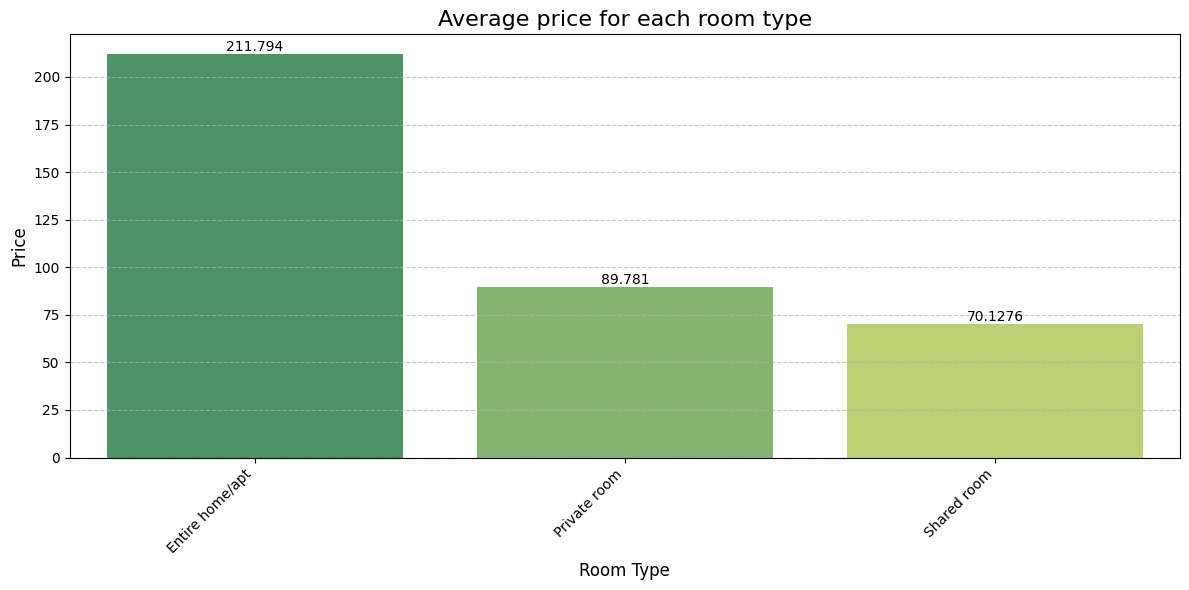

In [63]:
# Visualizing average price for each room type
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=df.groupby(['room_type'])['price'].mean().keys(), y=df.groupby(['room_type'])['price'].mean(), palette="summer" )
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Average price for each room type", fontsize=16)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

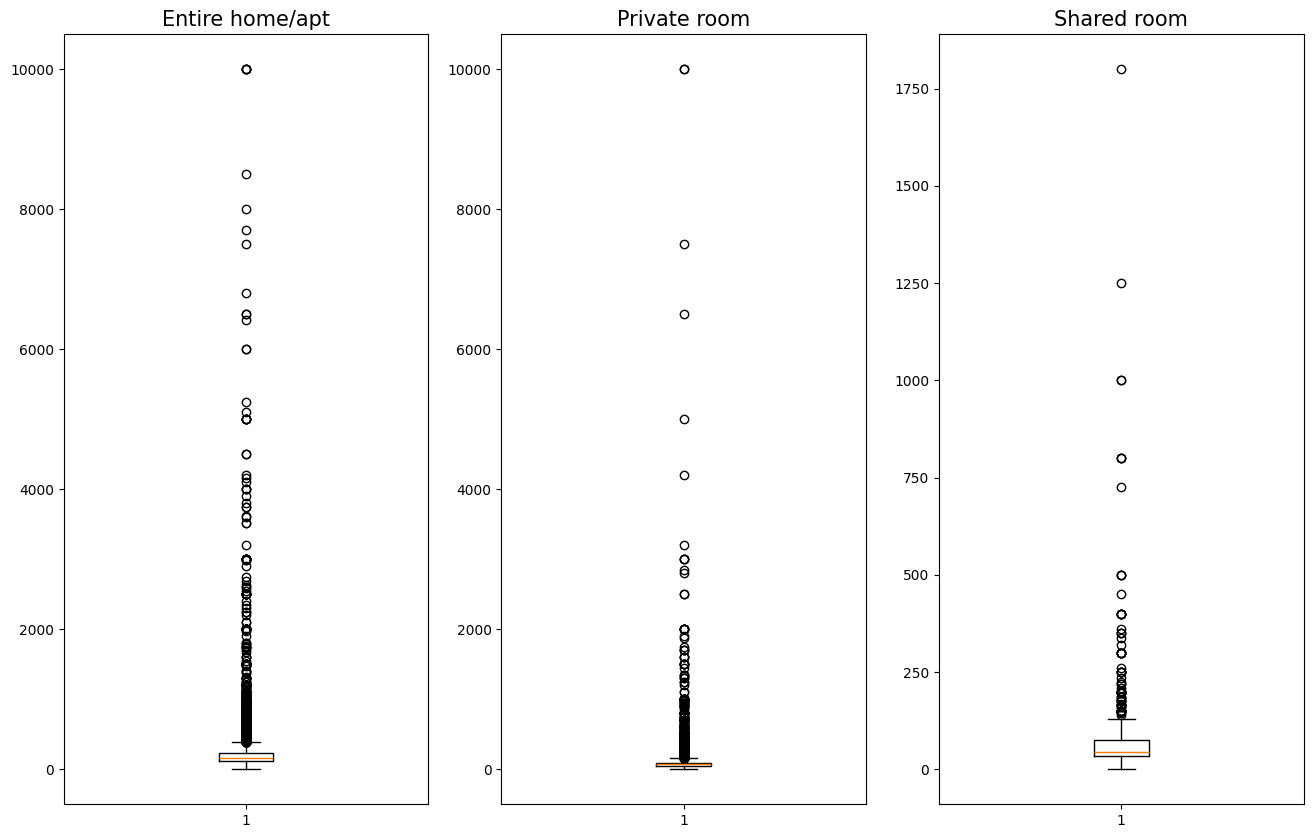

In [64]:
plt.figure(figsize = (16,10))

plt.subplot(1,3,1)
entire = df[df['room_type'] == 'Entire home/apt']
plt.boxplot(x  = entire['price'])
plt.title("Entire home/apt", fontsize = 15)

plt.subplot(1,3,2)
private = df[df['room_type'] == 'Private room']
plt.boxplot(x  = private['price'])
plt.title("Private room", fontsize = 15)

plt.subplot(1,3,3)
shared = df[df['room_type'] == 'Shared room']
plt.boxplot(x  = shared['price'])
plt.title("Shared room", fontsize = 15)

plt.show()

#### Observation 1
* The average price for the Entire home/apt room type is 211.79(dollars).
* The average price for the Private room room type is 89.78(dollars).
* The average price for the Shared room type is 70.12(dollars).
#### Observation 2
* The boxplot illustrates that the room type Entire home/apt has the highest price, reaching up to 10,000 dollars. Additionally, it exhibits numerous outliers, suggesting that the average price is likely higher compared to the other two room types.
* Conversely, the Private room category has fewer outliers compared to Entire home/apt, but its price also extends up to 10,000 dollars. However, its average price is approximately 90 dollars.
* Shared room is the least preferred room type, as indicated by both the mean price and the presence of outliers. The maximum price for a shared room is only 1,000 dollars, with an average price hovering around 70 dollars.

## Question 10: What are the average of minimum nights for different room types?

In [65]:
round(df.groupby(['room_type'])['minimum_nights'].mean().reset_index(), 0)

,room_type,minimum_nights
0,Entire home/apt,9.0
1,Private room,5.0
2,Shared room,6.0


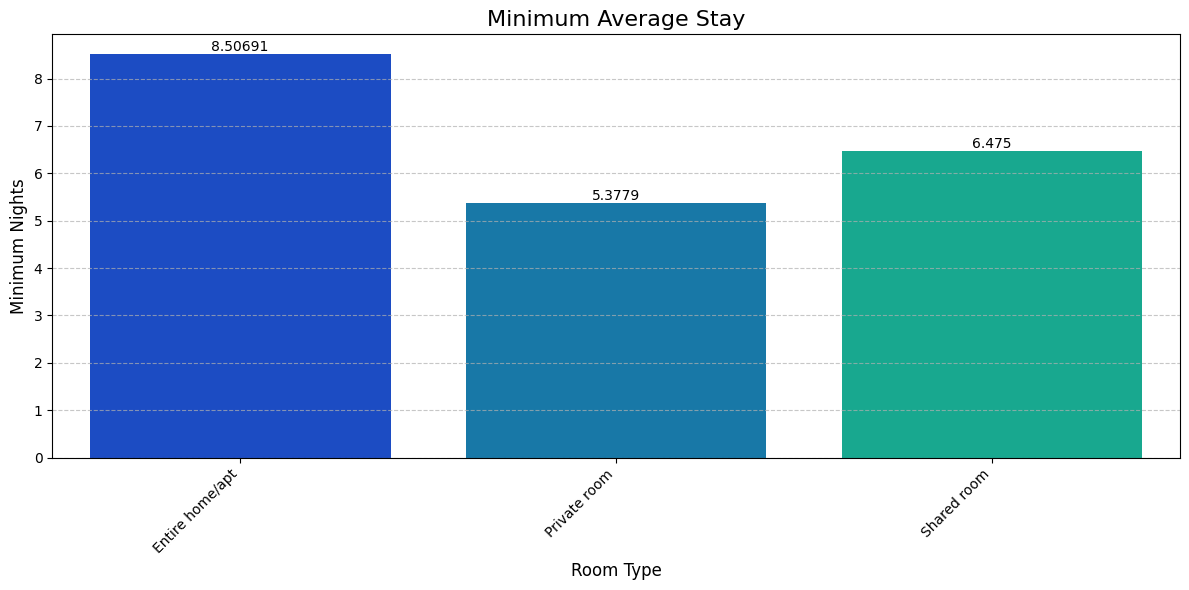

In [66]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=df.groupby(['room_type'])['minimum_nights'].mean().keys(), y=df.groupby(['room_type'])['minimum_nights'].mean(), palette="winter" )
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Minimum Average Stay", fontsize=16)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Minimum Nights", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

## Observation
* The mimimum days to stays in entire home/apt is 9 days
* The minimum days to stay for private room 5 days.
* The minimum days to stay for shared room is 6 days.

## Question 11: What are the top 10 number of days on which highest number of bookings were done?

In [67]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0


In [68]:
df['availability_365'].value_counts().iloc[:10].sort_index()

availability_365
0      17533
1        408
2        270
3        306
5        340
89       361
90       290
179      301
364      491
365     1295
Name: count, dtype: int64

Text(0, 0.5, 'Bookings')

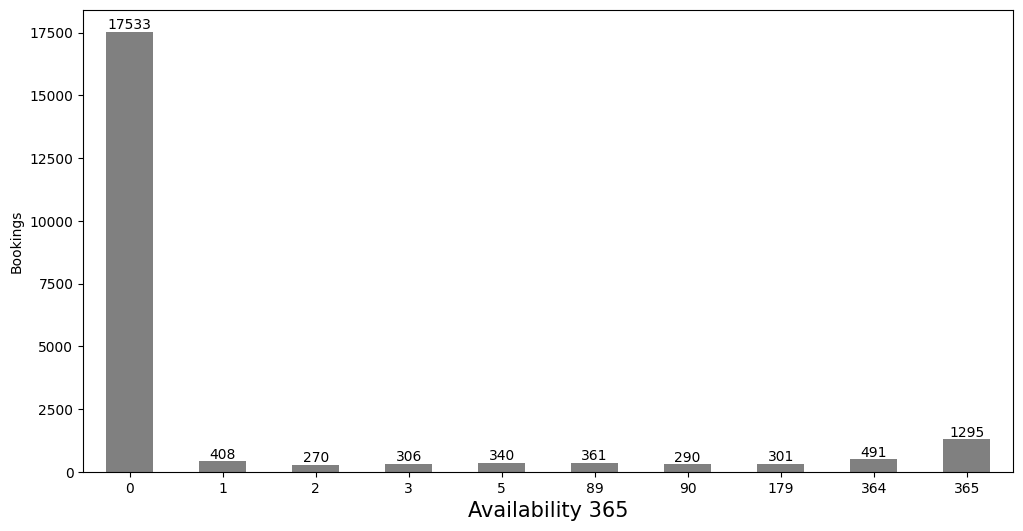

In [69]:
ax = df['availability_365'].value_counts().iloc[:10].sort_index().plot(kind = 'bar', figsize = (12,6), color = 'grey', fontsize = 10)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation = 360)
plt.xlabel('Availability 365', fontsize = 15)
plt.ylabel("Bookings")

## Question 12: What is the average number of reviews for each room type?

In [70]:
df.groupby(['room_type'])['number_of_reviews'].mean()

room_type
Entire home/apt    22.842418
Private room       24.112962
Shared room        16.600000
Name: number_of_reviews, dtype: float64

#### Observation
Surprisingly, Private rooms got more reviews

## Question 13: Which Neighbourhood group got the highest number of reviews?

In [71]:
df.groupby(['neighbourhood_group'])['number_of_reviews'].count().sort_values(ascending=False)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: number_of_reviews, dtype: int64

#### Observation
The Manhattan neighborhood group received the highest number of reviews, followed by Brooklyn with a total of 20,104 reviews.

In [72]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0


# I addressed the below questions :
1. What are the top 10 host IDs with the highest number of bookings?
2. What are the top 10 host Names with the highest number of bookings?
3. What types of rooms does the host with the highest number of bookings offer, and what is the price range for these rooms?
4. What types of rooms does the host with the second highest number of bookings offer, and what is the price range for these rooms?
5. Which Neighbourhood group has the highest number of bookings?
6. Which Neighbourhood Group has the maximum price range for rooms?
7. What are the Top 10 Neighbourhoods having highest number of bookings?
8. Which room type has highest number of bookings?
9. What is the Average price for each room type?
10. What are the average of minimum nights for different room types?
11. What are the top 10 number of days on which highest number of bookings were done?
12. What is the average number of reviews for each room type?
13. Which Neighbourhood group got the highest number of reviews?

# Key Findings
- The first Host ID from the top 10 host id's has 327 bookings constitutes to 66.8% of Total bookings
- The host named Michael has 417 bookings attributed to him, accounting for 85% of the total bookings, followed by David with the total bookings of 403.
- Michael, the host with the highest number of bookings, offers all room types, including Private rooms, Entire home/apts, and Shared rooms. Specifically, he has 251 Entire home/apts, 152 private rooms, and 14 Shared rooms. The price range for these accommodations is between 25 and 1700 dollars.
- David, the host with the second-highest number of bookings, provides all types of rooms, including Private rooms, Entire home/apts, and Shared rooms. Specifically, he offers 214 Entire home/apts, 184 private rooms, and 5 Shared rooms. The price range for these accommodations falls between $25 and $2000.
- An observation reveals that among all the neighborhood groups, the Manhattan group has the highest number of bookings, totaling 21,661, which constitutes 44.3% of all bookings across all groups, followed by Brooklyn which ranks as the second-highest neighborhood group with a total of 20,104 bookings, covering 41% of all bookings.Staten Island is the neighbourhood group with the least number of bookings which constitutes only 0.76% of all the bookings.'
- Observation says that Manhattan has the highest range of prices for the listings with 150 price as median observation, followed by Brooklyn with 90 per night.
- Bronx Neighbourhood is the cheapest among all the neighbourhoods.
- The Williamsburg neighborhood has the highest number of bookings, totaling 3,920, which constitutes 80% of all bookings.
- Entire home/apt has the highest number of bookings, accounting for 52% of the total bookings, with a total of 25,409 bookings. Private room follows closely behind with a total of 22,326 bookings, covering 46% of the total bookings. Shared rooms have the least number of bookings.
- Surprisingly, Private rooms got more reviews than Entire Home/apt.
- The Manhattan neighborhood group received the highest number of reviews, followed by Brooklyn with a total of 20,104 reviews.